## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [4]:
# Find the number of rows in the dataset
num_rows = df.shape[0]
num_rows


69889

`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [6]:
# Calculate the proportion of users who converted
conversion_proportion = df['converted'].mean()

# Convert to percentage and format with %
conversion_percentage = f"{conversion_proportion * 100:.2f}%"

conversion_percentage

'13.05%'

`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values_present = missing_values.any()
missing_values_present, missing_values


(np.False_,
 country      0
 group        0
 converted    0
 dtype: int64)

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [9]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts
df['country'].value_counts()


country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64

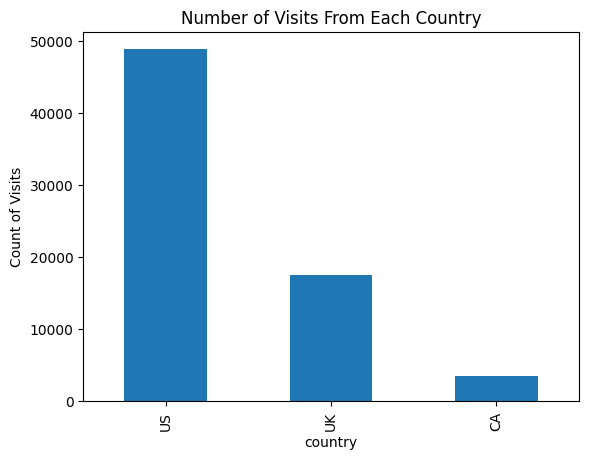

In [10]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [11]:
# Inspect the data types of all columns
data_info = df.info()

# Check which column is not categorical
non_categorical_columns = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
non_categorical_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


['converted']

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

In [12]:
# Find the unique values in the 'converted' column
converted_unique_values = df['converted'].unique()
converted_unique_values


array([0, 1])

**Does it make sense that these are the only values?**

Yes, it makes sense. The converted column represents a binary outcome:

- 0: The user did not convert.
- 1: The user converted.

Since the column is intended to record whether a user converted or not, having only these two values aligns with the expected representation of binary data.

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [15]:
# Calculate the overall probability of conversion
overall_conversion_probability = df['converted'].mean()
overall_conversion_probability = f"{overall_conversion_probability * 100:.2f}%"
overall_conversion_probability


'13.05%'

The probability of an individual converting, regardless of the page they receive or the country they are from, is approximately **13.05%**.

`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [16]:
df.query('group == "control"')['converted'].mean()

np.float64(0.1052540515600669)

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# Calculate the probability of conversion for individuals in the treatment group
treatment_conversion_probability = df[df['group'] == 'treatment']['converted'].mean()
treatment_conversion_probability = f"{treatment_conversion_probability * 100:.2f}%"
treatment_conversion_probability


'15.53%'

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

To evaluate whether the treatment is related to higher conversion rates, we can consider the following:

<ol>
<li><b>Probability Comparison:</b></li>
<ul>
<li>Conversion probability for the control group: <b>10.53%</b></li>
<li>Conversion probability for the treatment group: <b>15.53%</b></li>
</ul>
<p>The treatment group has a higher conversion rate compared to the control group, suggesting a potential relationship between being in the treatment group and higher conversion rates.</p>
<li><b>Statistical Significance:</b></li>
<ul>
<li>While the probabilities suggest a higher conversion rate for the treatment group, we cannot definitively conclude a causal relationship without conducting a statistical test (e.g., a two-proportion z-test). This would help determine whether the observed difference is statistically significant or due to random chance.</li>
</ul>
</ol>

`e)` What is the probability that an individual was in the `treatment`?

In [19]:
# Calculate the probability of an individual being in the treatment group
treatment_probability = (df['group'] == 'treatment').mean()
treatment_probability = f"{treatment_probability * 100:.2f}%"
treatment_probability

'50.38%'

`f)` What is the probability that an individual was from Canada `CA`?

In [21]:
# Calculate the probability of an individual being from Canada (CA)
canada_probability = (df['country'] == 'CA').mean()
canada_probability = f"{canada_probability * 100:.2f}%"
canada_probability

'4.99%'

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [23]:
df.query('country == "US"')['converted'].mean()

np.float64(0.13277379733879222)

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [24]:
uk_probability = df.query('country == "UK"')['converted'].mean()
uk_probability = f"{uk_probability * 100:.2f}%"
uk_probability

'12.51%'

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [26]:
"""To evaluate whether the conversion rate differs between countries, we can examine the conversion rates for each country
and perform statistical tests if needed."""

#Let’s calculate the conversion rates for each country first.
# Calculate conversion rates by country
conversion_rates_by_country = df.groupby('country')['converted'].mean()
conversion_rates_by_country



country
CA    0.125287
UK    0.125121
US    0.132774
Name: converted, dtype: float64

The observed conversion rates by country are as follows:

- **Canada (CA)**: 12.53%
- **United Kingdom (UK)**: 12.51%
- **United States (US)**: 13.28%

#### **Evidence of Differences**

There is a slight variation in conversion rates across countries. However, to conclude whether these differences are statistically significant, a hypothesis test (e.g., chi-squared test or a proportion z-test) would be required.

---

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [27]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [28]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.16%          |  9.45%          |
| Treatment   | 15.8%       |  14.87%          |  15.40%          |

#### **Interpretation**
The table shows variations in conversion rates between the control and treatment groups within each country. Specifically:

- The **treatment group** consistently has higher conversion rates than the control group across all countries.
- The magnitude of the increase in conversion rates varies by country, which may suggest an interaction effect between the country and the treatment.

In [29]:
# Calculate conversion rates by country and group using Method 2 (groupby)
conversion_rates_table = df.groupby(['country', 'group'])['converted'].mean() * 100

# Extract values for the table
control_us = conversion_rates_table.loc[('US', 'control')]
treatment_us = conversion_rates_table.loc[('US', 'treatment')]
control_uk = conversion_rates_table.loc[('UK', 'control')]
treatment_uk = conversion_rates_table.loc[('UK', 'treatment')]
control_ca = conversion_rates_table.loc[('CA', 'control')]
treatment_ca = conversion_rates_table.loc[('CA', 'treatment')]

control_us, treatment_us, control_uk, treatment_uk, control_ca, treatment_ca


(np.float64(10.731404958677686),
 np.float64(15.776876267748479),
 np.float64(10.164866401364412),
 np.float64(14.8698035632709),
 np.float64(9.44741532976827),
 np.float64(15.401662049861494))

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)`The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [42]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]
p_control_treatment_null,n_treatment,n_control

(np.float64(0.13047832992316388), 35211, 34678)

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [43]:
# treatment_converted
import numpy as np

# Simulate n_treatment transactions with a conversion rate of p_treatment_null
treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment).tolist()

# Display the first few values as a sample
treatment_converted[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [44]:
# Simulate n_control transactions with a conversion rate of p_control_null
control_converted = np.random.binomial(1, p_control_treatment_null, n_control).tolist()

# Display the first few values as a sample
control_converted[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [45]:
# Calculate the simulated conversion rates for treatment and control groups
simulated_p_treatment = np.mean(control_converted)
simulated_p_control = np.mean(control_converted)

# Calculate the estimated difference under the null
estimated_diff_null = simulated_p_treatment - simulated_p_control
estimated_diff_null


np.float64(0.0)

The estimated difference $p_{treatment}$ - $p_{control}$ under the null, based on the simulated values, is 0.0. This result aligns with the assumption under the null hypothesis that the two conversion rates are equal.

---


`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [46]:
p_diffs = []

for _ in range(500):
    # Simulate treatment and control conversions under the null
    treatment_converted_sim = np.random.binomial(n_treatment, p_control_treatment_null) / n_treatment
    control_converted_sim = np.random.binomial(n_control, p_control_treatment_null) / n_control
    
    # Calculate the difference in conversion rates for this simulation
    diff = treatment_converted_sim - control_converted_sim
    p_diffs.append(diff)

# Convert to numpy array
p_diffs = np.array(p_diffs)

# Display the first few simulated differences
p_diffs[:10]

array([-0.00303778, -0.00039661, -0.00346861, -0.00267425, -0.00237107,
        0.00025968, -0.00161474, -0.00206609, -0.0004805 , -0.00171522])

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<Axes: >

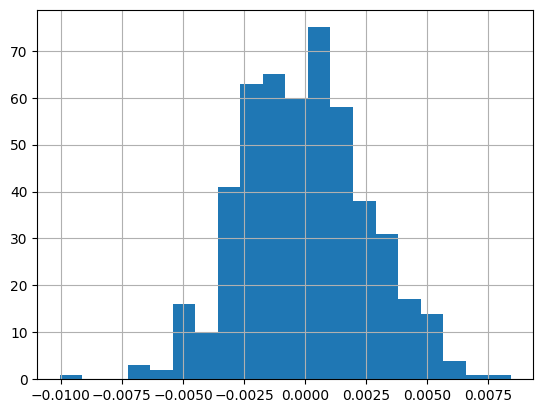

In [47]:
p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [49]:
treatment_conversion_rate = df.query('group == "treatment"')['converted'].mean()
control_conversion_rate = df.query('group == "control"')['converted'].mean()

observed_diff = treatment_conversion_rate - control_conversion_rate
# Proportion of p_diffs greater than the observed difference
proportion_greater = (p_diffs > observed_diff).mean()
print("Observed Difference:", observed_diff)
print("Proportion Greater Than Observed:", proportion_greater)

Observed Difference: 0.050066728877864425
Proportion Greater Than Observed: 0.0


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

**Your Answer Here**
- **What was computed:**
    - the **observed difference** of **0.0501** represents the actual difference in conversion rates between the treatment group and the control group based on the dataset.
    - The **proportion greater than observed** (p-value) of **0.0** represents the proportion of simulated differences under the null hypothesis that are greater than or equal to the observed difference.
- **What is this value called in scientific studies?**
    - The proportion greater than observed is called the **p-value** in scientific studies.
- **What does this value mean?**
    - A p-value of **0.0** means that the probability of observing a difference as extreme as 0.0501 (or more extreme) under the null hypothesis (no true difference) is practically zero.
    - Since the p-value is less than our Type I error rate (*α*=0.05), we reject the null hypothesis.
- **Conclusion:**
    - There is strong statistical evidence to suggest that the conversion rate for the new page (treatment) is significantly higher than the old page (control) at the 5% significance level.

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Your Answer Here**

Since each row represents a binary outcome (conversion = 1, no conversion = 0), the appropriate type of regression to perform is **logistic regression**.

#### Why Logistic Regression?
 - Logistic regression is designed for binary classification problems where the dependent variable is categorical (e.g., 0 or 1).
 - It estimates the probability of the dependent variable being 1, given the independent variables.

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [50]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'], drop_first=True)['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,False
1,US,treatment,1,1,True
2,UK,treatment,0,1,True
3,UK,control,0,1,False
4,UK,treatment,0,1,True


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [58]:
# Ensure all columns are numeric
X = df[['intercept', 'ab_page']].astype(float)
y = df['converted'].astype(float)
X.head(),y.head()

(   intercept  ab_page
 0        1.0      0.0
 1        1.0      1.0
 2        1.0      1.0
 3        1.0      0.0
 4        1.0      1.0,
 0    0.0
 1    1.0
 2    0.0
 3    0.0
 4    0.0
 Name: converted, dtype: float64)

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [59]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [60]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                0.007175
Time:                        14:20:02   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

**Your Answer Here.**
- **P-Value for** `ab_page`:
    - The p-value associated with the `ab_page` coefficient is **0.000** (or 1.81×10^−86)
    - This extremely small p-value indicates strong evidence against the null hypothesis for the `ab_page` variable.

**Does it Lead to the Same Conclusion?**

Yes, this result supports the same conclusion drawn in the **Experiment** section:

- The null hypothesis assumes no difference between the treatment and control groups in terms of conversion rate.
- The p-value of **0.000** indicates that the difference in conversion rates between the treatment and control groups is statistically significant at any reasonable Type I error threshold (e.g., *𝛼* = 0.05).

**Final Conclusion:**
The logistic regression analysis confirms that the **treatment group (new page)** leads to a significantly higher conversion rate compared to the **control group (old page)**.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [86]:
import pandas as pd

# Example dataset
df = pd.read_csv('ab_data.csv')

# Add intercept column
df['intercept'] = 1

# Add ab_page column
df['ab_page'] = pd.get_dummies(df['group'], drop_first=True)

# Add dummy variables for 'US' and 'UK' with binary values
country_dummies = pd.get_dummies(df['country'], drop_first=True).astype(int)
df = pd.concat([df, country_dummies], axis=1)

# Display the updated DataFrame
print(df)


      country      group  converted  intercept  ab_page  UK  US
0          UK    control          0          1    False   1   0
1          US  treatment          1          1     True   0   1
2          UK  treatment          0          1     True   1   0
3          UK    control          0          1    False   1   0
4          UK  treatment          0          1     True   1   0
...       ...        ...        ...        ...      ...  ..  ..
69884      UK  treatment          0          1     True   1   0
69885      UK    control          0          1    False   1   0
69886      UK  treatment          0          1     True   1   0
69887      US    control          0          1    False   0   1
69888      US  treatment          0          1     True   0   1

[69889 rows x 7 columns]


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 6
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [87]:
# Create the X matrix and y response column for logistic regression

# Define X to include intercept, ab_page, and country dummies (US and UK)
newX = df[['intercept', 'ab_page', 'US', 'UK']].astype(float)

# Define y as the response variable
newy = df['converted'].astype(float)

# Display X and y to verify
newX, newy


(       intercept  ab_page   US   UK
 0            1.0      0.0  0.0  1.0
 1            1.0      1.0  1.0  0.0
 2            1.0      1.0  0.0  1.0
 3            1.0      0.0  0.0  1.0
 4            1.0      1.0  0.0  1.0
 ...          ...      ...  ...  ...
 69884        1.0      1.0  0.0  1.0
 69885        1.0      0.0  0.0  1.0
 69886        1.0      1.0  0.0  1.0
 69887        1.0      0.0  1.0  0.0
 69888        1.0      1.0  1.0  0.0
 
 [69889 rows x 4 columns],
 0        0.0
 1        1.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 69884    0.0
 69885    0.0
 69886    0.0
 69887    0.0
 69888    0.0
 Name: converted, Length: 69889, dtype: float64)

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [88]:
import statsmodels.api as sm

# Fit the logistic regression model
log_model = sm.Logit(newy, newX)
results = log_model.fit()

# Display the summary of the results
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                0.007312
Time:                        15:43:32   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.

`d)` Provide the summary of your model below.

### Summary of the Logistic Regression Model:
#### Key Observations:
1. **Dependent Variable**
    - The `converted column` is the binary response variable indicating whether a user converted (1) or not (0).
2. **Independent Variables**
    - Intercept: The baseline conversion rate when all other predictors are 0.
    - ab_page: The difference in conversion rates between the treatment and control groups.
    - US: The difference in conversion rates for users from the US compared to the baseline (CA).
    - UK: The difference in conversion rates for users from the UK compared to the baseline (CA).
3. **Coefficients**:
    - **Intercept**: -2.1930
        - This corresponds to the baseline log-odds of conversion.
    - **ab_page**: 0.4466
        - A positive and significant coefficient indicates that being in the treatment group increases the log-odds of conversion compared to the control group.
    - **US**: 0.0727
        - A positive coefficient but with a p-value of 0.170, which is not statistically significant (p > 0.05).
    - **UK**: 0.0067
        - A positive coefficient but with a p-value of 0.905, which is not statistically significant (p > 0.05).
4. **Statistical Significance**:     
    - **ab_page**: The p-value is 0.000, indicating a statistically significant effect of being in the treatment group.
    - **US and UK**: Both p-values are greater than 0.05, indicating that the country of the user (US or UK) does not have a statistically significant effect on conversion compared to the baseline (CA).

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**Interpretation of P-values for US and UK**:
#### P-values:
- **US**: 𝑝 = 0.170
- **UK**: 𝑝 = 0.905
#### What do these P-values suggest?
1. **US**:
    - The p-value for the US coefficient is 0.170, which is greater than the common significance level (𝛼 = 0.05).
    - This means that there is **no statistically significant evidence** that being from the US impacts the likelihood of conversion compared to the baseline country (CA).
2. **UK**:
    - The p-value for the `UK` coefficient is 0.905, which is much greater than 𝛼 = 0.05.
    - This indicates that being from the UK also does **not significantly impact** the likelihood of conversion compared to the baseline (CA).

### **Conclusion**:

The results suggest that the **country of origin (US or UK)** does not play a significant role in determining whether a user converts, relative to the baseline country (CA). Any differences in conversion rates across these countries are likely due to random variation rather than a true effect.

---

